In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os,sys
from pandas.plotting import scatter_matrix 

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


from scripts.utils import (
    detect_outliers_iqr,
    plot_time_series, 
    plot_correlation_analysis, 
    plot_wind_analysis, 
    plot_temperature_analysis, 
    plot_histograms, 
    calculate_z_scores, 
    plot_bubble_chart, 
    clean_dataset
)


Reading The Data from CSV

In [21]:
benin_df = pd.read_csv('../Data/benin-malanville.csv')
benin_df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


In [22]:
benin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

cheaking missing values

In [23]:
benin_df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Checking for wrong entries like symbols -,?,#,*,etc

In [24]:
for col in benin_df.columns:
    print('{} : {}'.format(col,benin_df[col].unique()))

Timestamp : ['2021-08-09 00:01' '2021-08-09 00:02' '2021-08-09 00:03' ...
 '2022-08-08 23:58' '2022-08-08 23:59' '2022-08-09 00:00']
GHI : [ -1.2  -1.1  -1.  ... -11.3 -12.9 -12.6]
DNI : [-0.2 -0.1 -0.3 ... -3.4 -3.8 -4.7]
DHI : [ -1.1  -1.   -1.2 ... 712.3 716.1 649. ]
ModA : [0.000e+00 1.000e-01 2.000e-01 ... 1.182e+03 1.163e+03 1.191e+03]
ModB : [0.000e+00 1.000e-01 2.000e-01 ... 1.189e+03 1.153e+03 1.161e+03]
Tamb : [26.2 26.1 26.  25.9 25.8 25.7 25.6 25.5 25.4 25.3 25.2 25.1 25.  24.9
 24.8 24.7 24.6 24.5 24.4 24.3 24.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9
 27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 28.  28.1 28.3 28.2 28.4 28.7
 28.9 28.8 29.  29.1 29.3 29.7 29.9 29.5 29.4 29.2 29.6 30.  30.2 30.4
 30.3 30.1 30.6 30.9 31.1 31.  31.2 30.5 29.8 30.8 30.7 31.5 31.8 31.9
 31.6 31.7 31.4 31.3 32.  32.3 32.4 32.5 32.8 33.  33.1 33.2 33.3 32.7
 32.1 32.2 32.6 28.6 28.5 27.9 27.  24.1 24.  23.9 23.8 23.7 23.6 23.5
 23.4 23.3 23.2 23.1 23.  22.9 22.7 22.6 22.5 22.4 22.3 22.2 22.1 22.
 21.9 22.

First filtering the Dataframe to include only numeric columns and then computing the summary statistics.

In [25]:
numeric_columns = benin_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
summary_statistics.head(100)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Computing summary statistics for all numeric columns

In [26]:
summary_statistics =  benin_df.describe()
summary_statistics

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


mean

In [27]:
numeric_columns = benin_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
mean = summary_statistics.mean()
mean.round(2)

GHI              66006.87
DNI              65910.87
DHI              65854.56
ModA             65996.75
ModB             65992.49
Tamb             65721.68
RH               65743.58
WS               65703.65
WSgust           65704.93
WSstdev          65700.81
WD               65836.36
WDstdev          65717.37
BP               66445.96
Cleaning         65700.13
Precipitation    65700.32
TModA            65730.14
TModB            65727.43
Comments             0.00
dtype: float64

median

In [28]:
numeric_columns = benin_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
median = summary_statistics.median()
median.round(3)

GHI              285.845
DNI              214.449
DHI              137.025
ModA             281.742
ModB             272.710
Tamb              28.090
RH                54.794
WS                 2.011
WSgust             2.705
WSstdev            0.487
WD               167.218
WDstdev            8.591
BP               994.099
Cleaning           0.000
Precipitation      0.001
TModA             32.623
TModB             30.686
Comments           0.000
dtype: float64

range

In [29]:
numeric_columns = benin_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
range = summary_statistics.max() - summary_statistics.min()
range.round(3)

GHI              525612.900
DNI              525607.800
DHI              525612.600
ModA             525600.000
ModB             525600.000
Tamb             525594.076
RH               525597.900
WS               525600.000
WSgust           525600.000
WSstdev          525600.000
WD               525600.000
WDstdev          525600.000
BP               525597.525
Cleaning         525600.000
Precipitation    525600.000
TModA            525591.000
TModB            525591.900
Comments              0.000
dtype: float64

variance

In [30]:
numeric_columns = benin_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
variance = summary_statistics.var()
variance

GHI              3.448607e+10
DNI              3.450036e+10
DHI              3.450878e+10
ModA             3.448757e+10
ModB             3.448821e+10
Tamb             3.452867e+10
RH               3.452538e+10
WS               3.453137e+10
WSgust           3.453118e+10
WSstdev          3.453180e+10
WD               3.451146e+10
WDstdev          3.452931e+10
BP               3.442011e+10
Cleaning         3.453190e+10
Precipitation    3.453187e+10
TModA            3.452739e+10
TModB            3.452780e+10
Comments                  NaN
dtype: float64

standard_deviation

In [31]:
numeric_columns = benin_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
standard_deviation = summary_statistics.std()
standard_deviation.round(3)

GHI              185704.257
DNI              185742.723
DHI              185765.382
ModA             185708.286
ModB             185710.006
Tamb             185818.904
RH               185810.055
WS               185826.186
WSgust           185825.670
WSstdev          185827.336
WD               185772.598
WDstdev          185820.646
BP               185526.574
Cleaning         185827.610
Precipitation    185827.534
TModA            185815.483
TModB            185816.581
Comments                NaN
dtype: float64

data quality check

Missing values

In [32]:
missing_values = benin_df.isna().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Check for negative values in columns that should only have positive values

In [33]:
incorrect_entries = {
    'GHI': (benin_df['GHI'] < 0).sum(),
    'DNI': (benin_df['DNI'] < 0).sum(),
    'DHI': (benin_df['DHI'] < 0).sum(),
}

print("\nIncorrect Values:")
for key, value in incorrect_entries.items():
    print(f' {key} : {value}')


Incorrect Values:
 GHI : 258847
 DNI : 275987
 DHI : 259182


Defining a function to calculate IQR and detect outliers

In [34]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

outliers = {
    'ModA': detect_outliers_iqr(benin_df['ModA']),
    'ModB': detect_outliers_iqr(benin_df['ModB']),
    'WS': detect_outliers_iqr(benin_df['WS']),
    'WSgust': detect_outliers_iqr(benin_df['WSgust'])
}

print("\nOutliers Detected:")
for key, value in outliers.items():
    print(f' {key} : {value}')


Outliers Detected:
 ModA : 98
 ModB : 240
 WS : 6717
 WSgust : 5368


Time series analysis

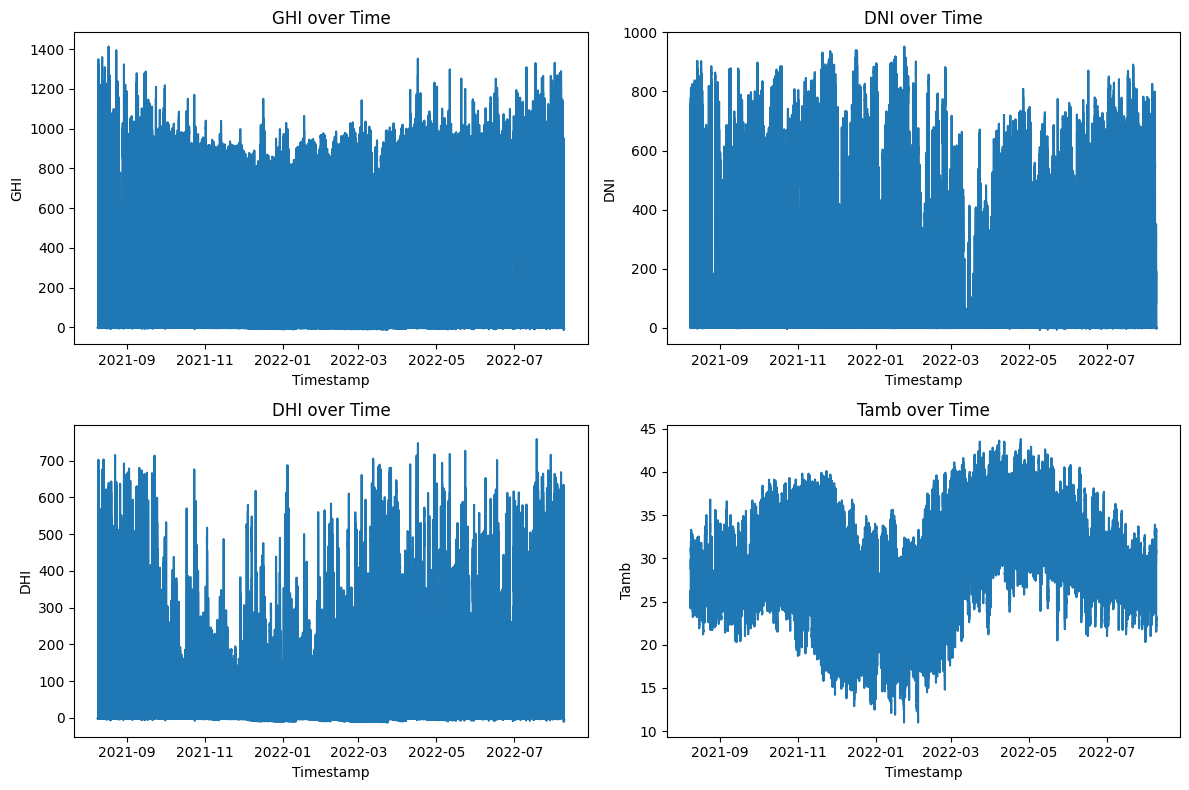

In [35]:
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.lineplot(x='Timestamp', y='GHI', data=benin_df)
plt.title('GHI over Time')


plt.subplot(2, 2, 2)
sns.lineplot(x='Timestamp', y='DNI', data=benin_df)
plt.title('DNI over Time')


plt.subplot(2, 2, 3)
sns.lineplot(x='Timestamp', y='DHI', data=benin_df)
plt.title('DHI over Time')


plt.subplot(2, 2, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=benin_df)
plt.title('Tamb over Time')

plt.tight_layout()
plt.show()

correlation analysis plots

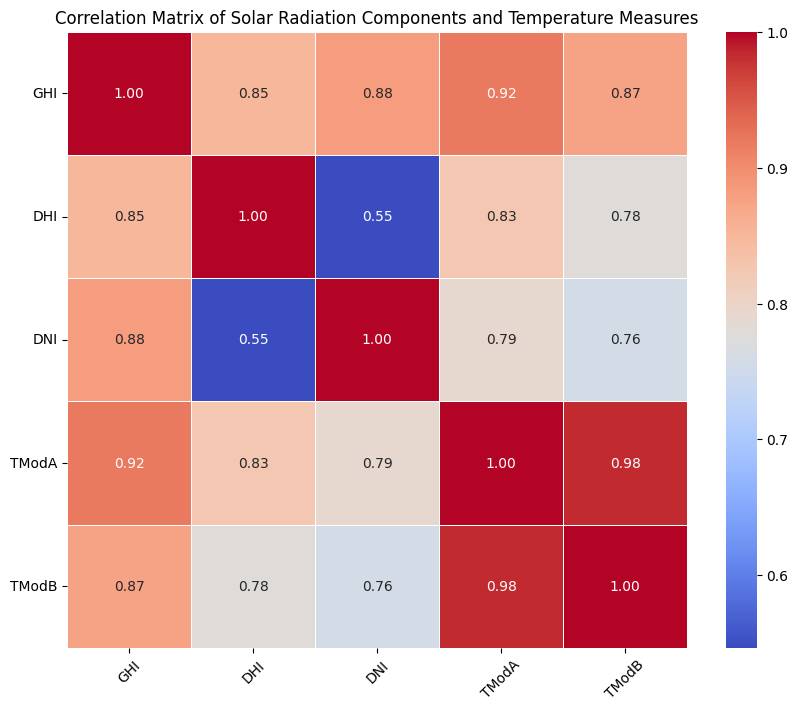

In [36]:
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']
dataset_subset = benin_df[columns_of_interest]


correlation_matrix = dataset_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

wind analysis

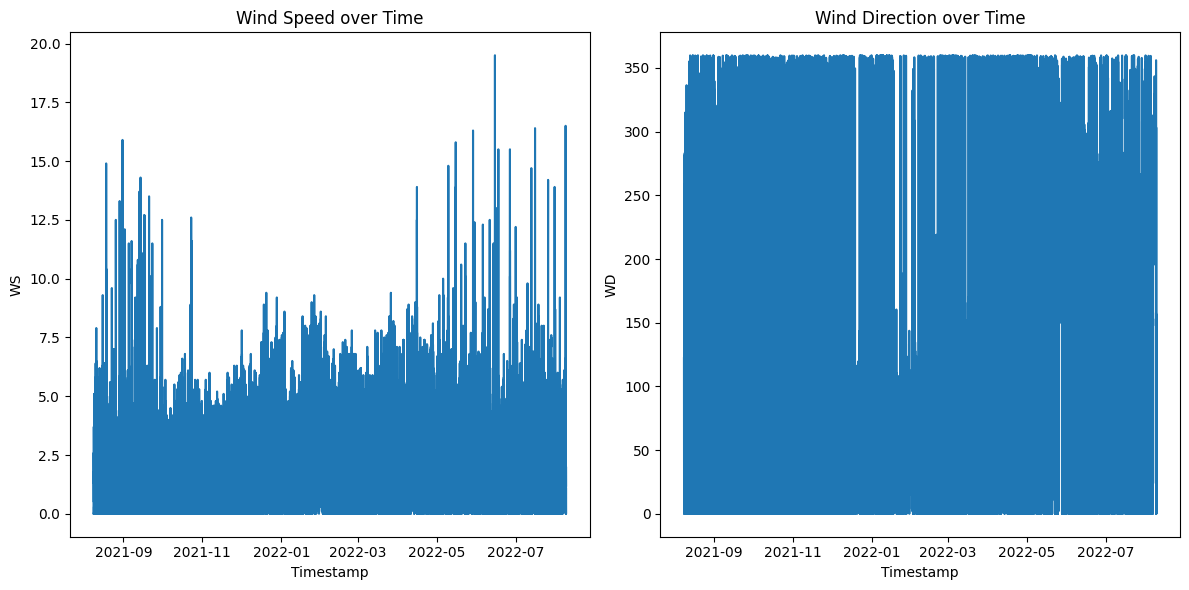

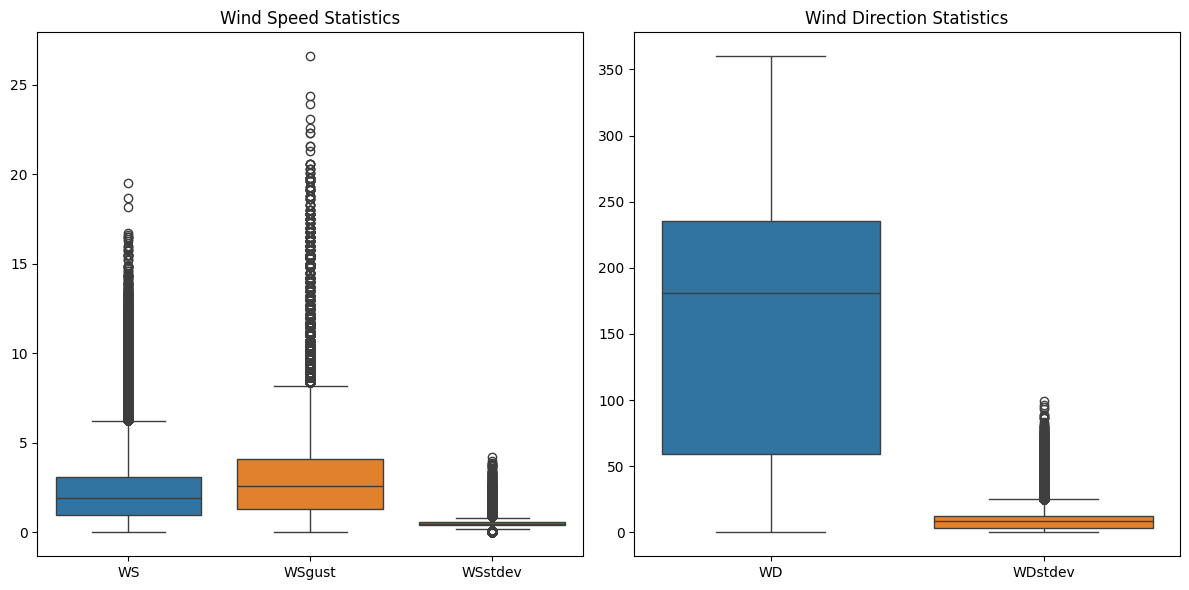

In [37]:
wind_columns = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
dataset_wind = benin_df[wind_columns]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Timestamp', y='WS', data=benin_df)
plt.title('Wind Speed over Time')


plt.subplot(1, 2, 2)
sns.lineplot(x='Timestamp', y='WD', data=benin_df)
plt.title('Wind Direction over Time')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset_wind[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Statistics')


plt.subplot(1, 2, 2)
sns.boxplot(data=dataset_wind[['WD', 'WDstdev']], orient='v')
plt.title('Wind Direction Statistics')

plt.tight_layout()
plt.show()

Tempurature Analysis plot

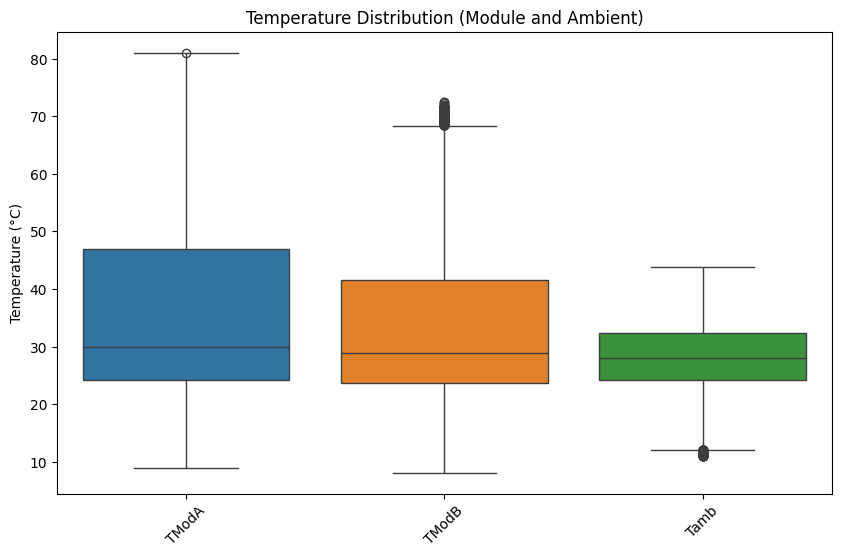

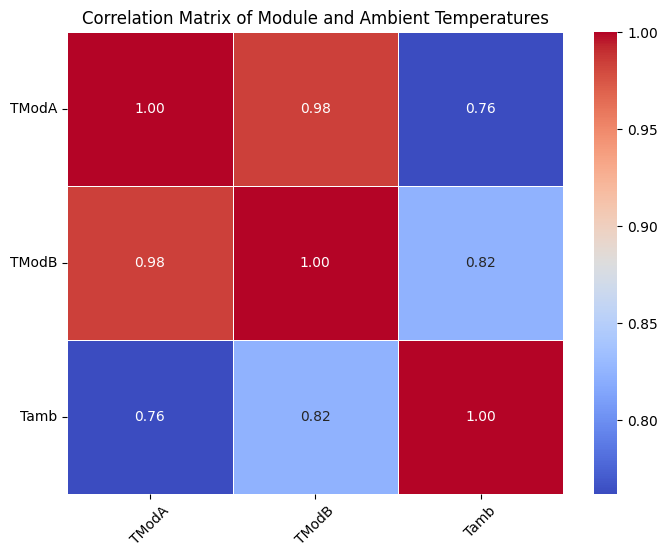

In [38]:
temperature_columns = ['TModA', 'TModB', 'Tamb']
dataset_temperatures = benin_df[temperature_columns]


plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_temperatures, orient='v')
plt.title('Temperature Distribution (Module and Ambient)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(dataset_temperatures.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Module and Ambient Temperatures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()